<a href="https://colab.research.google.com/github/Aditipetkar/Texas-Salary-Prediction/blob/main/texasSalPred_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

In [6]:
df=pd.read_csv("salary.csv")

/tmp/ipython-input-235749869.py:1: DtypeWarning: Columns (16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("salary.csv")


In [7]:
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717.0,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717.0,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115.0,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115.0,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030.0,True,1.0,NaN,NaN,NaN


In [8]:

# Overview of data
df.info()

# Count missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108832 entries, 0 to 108831
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   108832 non-null  int64  
 1   AGENCY NAME              108832 non-null  object 
 2   LAST NAME                108832 non-null  object 
 3   FIRST NAME               108832 non-null  object 
 4   MI                       108832 non-null  object 
 5   CLASS CODE               108832 non-null  object 
 6   CLASS TITLE              108832 non-null  object 
 7   ETHNICITY                108831 non-null  object 
 8   GENDER                   108831 non-null  object 
 9   STATUS                   108831 non-null  object 
 10  EMPLOY DATE              108831 non-null  object 
 11  HRLY RATE                108831 non-null  float64
 12  HRS PER WK               108831 non-null  float64
 13  MONTHLY                  108831 non-null  float64
 14  ANNU

,0
AGENCY,0
AGENCY NAME,0
LAST NAME,0
FIRST NAME,0
MI,0
CLASS CODE,0
CLASS TITLE,0
ETHNICITY,1
GENDER,1
STATUS,1


In [9]:
drop_cols = ['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
             'summed_annual_salary', 'hide_from_search']
df.drop(columns=drop_cols, inplace=True)
df['EMPLOY DATE'] = pd.to_datetime(df['EMPLOY DATE'], errors='coerce')


/tmp/ipython-input-722507106.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['EMPLOY DATE'] = pd.to_datetime(df['EMPLOY DATE'], errors='coerce')


In [10]:
#Descriptive Statistics
df.describe()

,AGENCY,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
count,108832.000000,108831,108831.000000,108831.000000,108831.000000,108831.000000,1.088310e+05
mean,504.640060,2014-04-22 11:19:08.860159232,0.406600,39.817285,4309.845771,51718.149256,5.602522e+05
min,101.000000,1975-09-01 00:00:00,0.000000,3.350000,392.560000,4710.720000,1.000000e+00
25%,407.000000,2011-12-01 00:00:00,0.000000,40.000000,2924.785000,35097.420000,1.123860e+05
50%,529.000000,2017-03-06 00:00:00,0.000000,40.000000,3816.000000,45792.000000,3.440890e+05
75%,537.000000,2018-12-01 00:00:00,0.000000,40.000000,5038.950000,60467.400000,1.095344e+06
max,809.000000,2073-09-10 00:00:00,117.788480,70.000000,46125.000000,553500.000000,1.270648e+06
std,112.632778,NaN,4.812922,1.849127,2182.087269,26185.047228,4.773583e+05


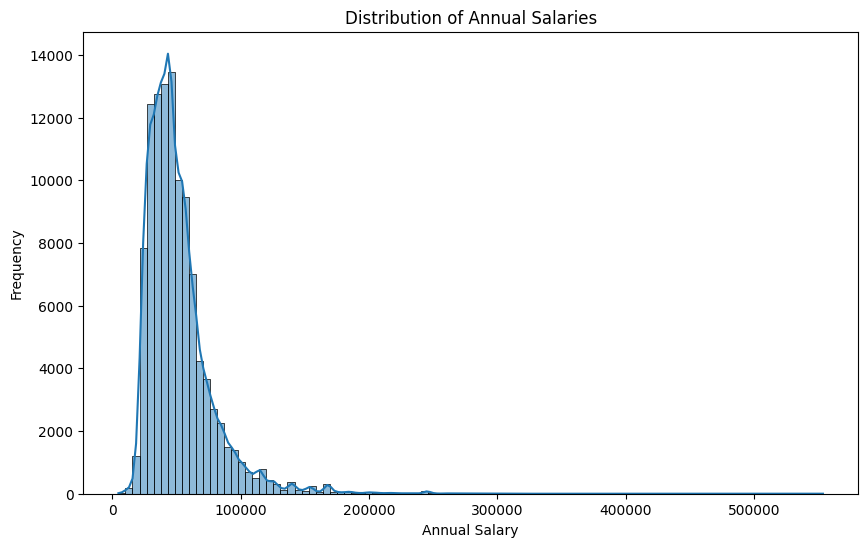

In [11]:
# Distribution of Annual Salary
plt.figure(figsize=(10,6))
sns.histplot(df['ANNUAL'], bins=100, kde=True)
plt.title('Distribution of Annual Salaries')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.show()

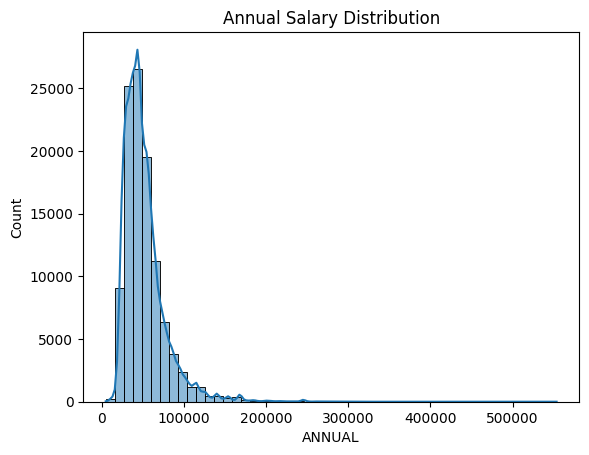

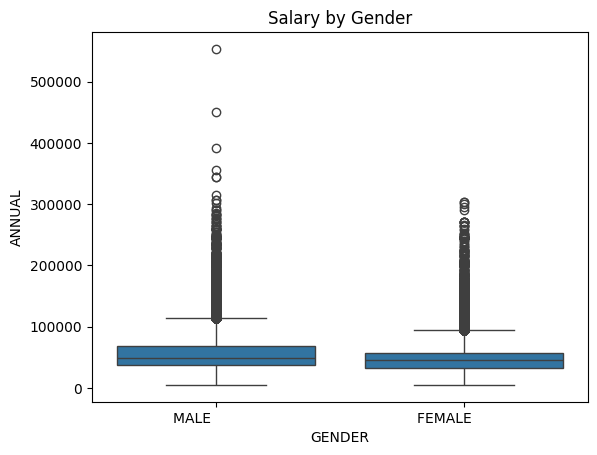

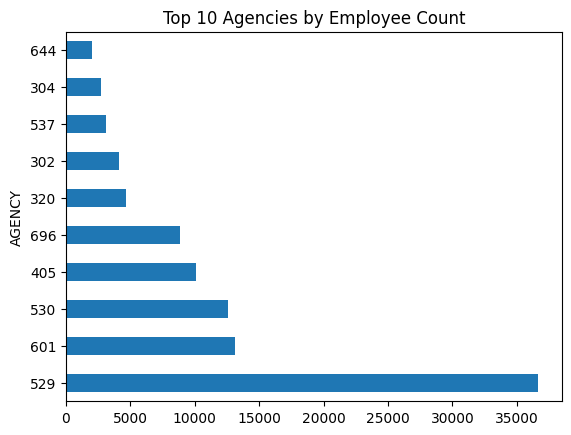

In [12]:


sns.histplot(df['ANNUAL'], bins=50, kde=True)
plt.title('Annual Salary Distribution')
plt.show()
# Boxplot by gender
sns.boxplot(x='GENDER', y='ANNUAL', data=df)
plt.title('Salary by Gender')
plt.show()
# Count by agency
df['AGENCY'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Agencies by Employee Count')
plt.show()

In [13]:
# prompt: use random forest algo to get predictions

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Preprocessing - Handle categorical features
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    if col in df.columns: # Check if the column exists after dropping others
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Handle 'EMPLOY DATE' by converting it to a numerical representation (e.g., number of days since a reference date)
if 'EMPLOY DATE' in df.columns:
    df['EMPLOY DATE_numeric'] = (df['EMPLOY DATE'] - df['EMPLOY DATE'].min()).dt.days
    df.drop(columns=['EMPLOY DATE'], inplace=True)

# Define features (X) and target (y)
# Drop the target variable and any remaining non-numeric or id columns
X = df.drop(columns=['ANNUAL'])
y = df['ANNUAL']

# Drop columns with missing values in X if any remain after initial processing
X.dropna(axis=1, inplace=True)
y.dropna(inplace=True)

# Ensure X and y have the same number of rows after dropping NaNs
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# You can now use rf_model to make predictions on new data

Mean Squared Error: 47138655.65567287
R-squared: 0.9325367921927988


In [14]:
# prompt: by using linear regression

from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression Mean Squared Error: {mse_lr}')
print(f'Linear Regression R-squared: {r2_lr}')

# You can now use lr_model to make predictions on new data

Linear Regression Mean Squared Error: 578589393.2126138
Linear Regression R-squared: 0.17194294308120472


In [15]:
# prompt: by using xgboost model

!pip install xgboost

import xgboost as xgb

# Initialize and train the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', # For regression tasks
                             n_estimators=100,
                             learning_rate=0.1,
                             max_depth=5,
                             random_state=42,
                             n_jobs=-1)

xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')

# You can now use xgb_model to make predictions on new data

XGBoost Mean Squared Error: 100854884.73226112
XGBoost R-squared: 0.8556599896109885


In [16]:
# prompt: by using decision tree model

from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Mean Squared Error: {mse_dt}')
print(f'Decision Tree R-squared: {r2_dt}')

# You can now use dt_model to make predictions on new data


Decision Tree Mean Squared Error: 65300222.033860296
Decision Tree R-squared: 0.9065445887743188


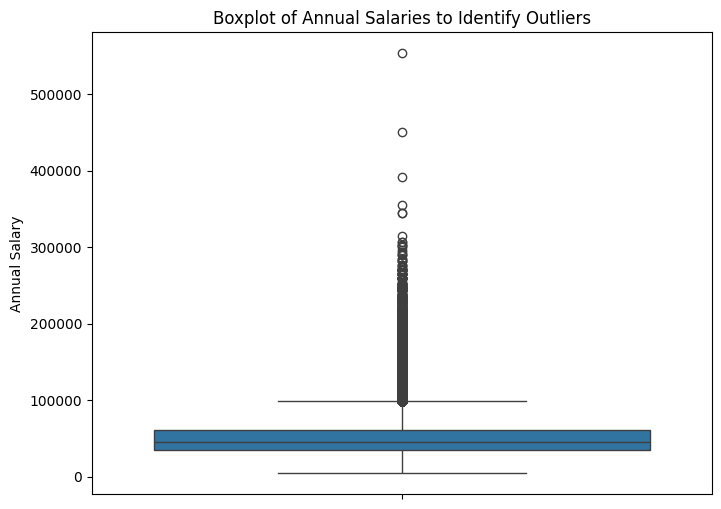


Descriptive statistics for Annual Salary:
count    108831.000000
mean      51718.149256
std       26185.047228
min        4710.720000
25%       35097.420000
50%       45792.000000
75%       60467.400000
max      553500.000000
Name: ANNUAL, dtype: float64

Potential Outliers (using IQR method, 1.5 * IQR):
    AGENCY     ANNUAL
0      241  114549.84
2      241  114549.84
5      302  154788.00
7      510  120000.00
38     101  111000.00

Number of potential outliers (using IQR method): 5515


In [17]:
# prompt: outliers in the salaries?

# Use a boxplot to visualize potential outliers in the 'ANNUAL' salary column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ANNUAL'])
plt.title('Boxplot of Annual Salaries to Identify Outliers')
plt.ylabel('Annual Salary')
plt.show()

# You can also use descriptive statistics to find values that are far from the mean or median
# For example, looking at the min and max values and comparing them to the quartiles
print("\nDescriptive statistics for Annual Salary:")
print(df['ANNUAL'].describe())

# Another common method to identify outliers is using the Interquartile Range (IQR)
Q1 = df['ANNUAL'].quantile(0.25)
Q3 = df['ANNUAL'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers_iqr = df[(df['ANNUAL'] < lower_bound) | (df['ANNUAL'] > upper_bound)]

print(f"\nPotential Outliers (using IQR method, 1.5 * IQR):")
print(outliers_iqr[['AGENCY', 'ANNUAL']].head()) # Print a few example outliers

# You can count the number of outliers
print(f"\nNumber of potential outliers (using IQR method): {len(outliers_iqr)}")

/tmp/ipython-input-1808678326.py:4: DtypeWarning: Columns (16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_time = pd.read_csv("salary.csv")
/tmp/ipython-input-1808678326.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_time['EMPLOY DATE'] = pd.to_datetime(df_time['EMPLOY DATE'], errors='coerce')


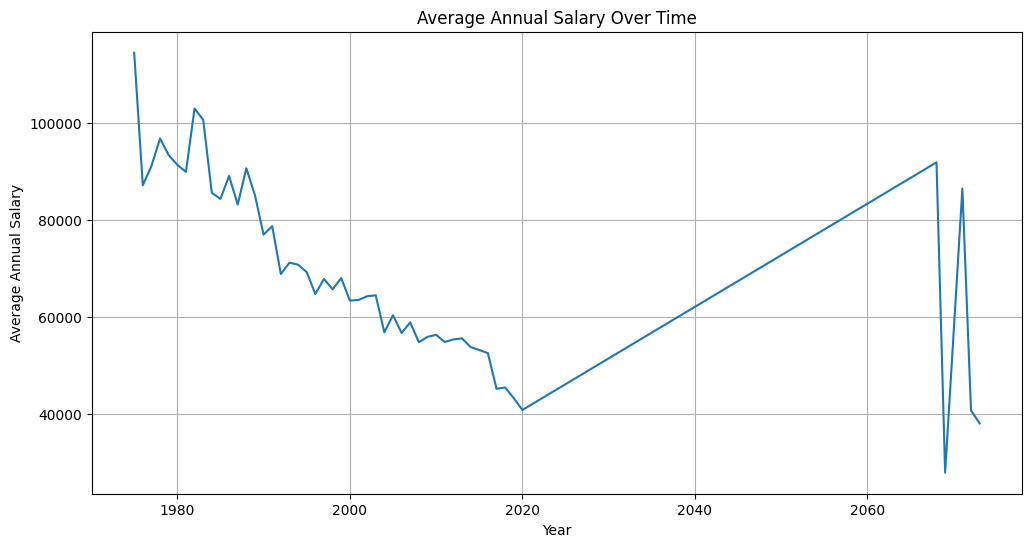

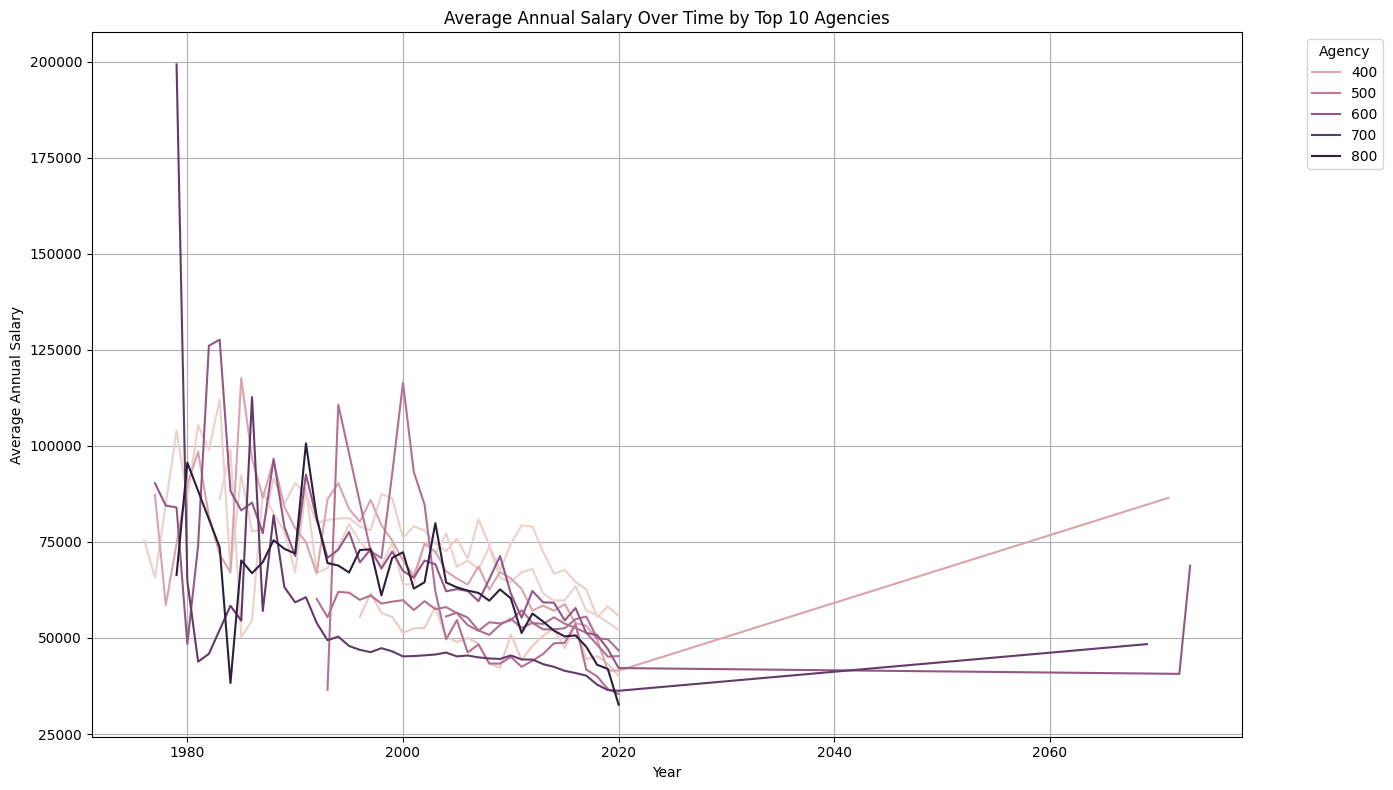

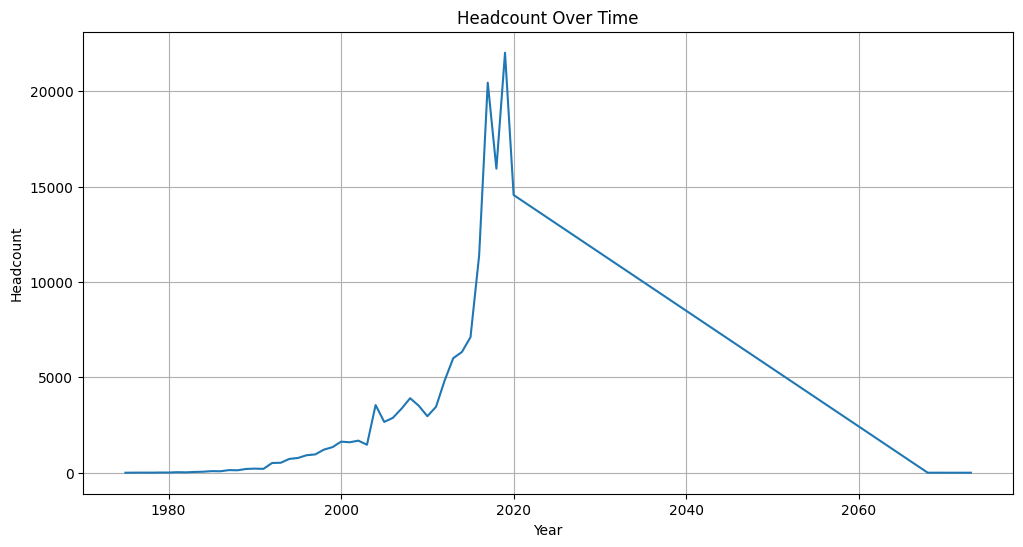

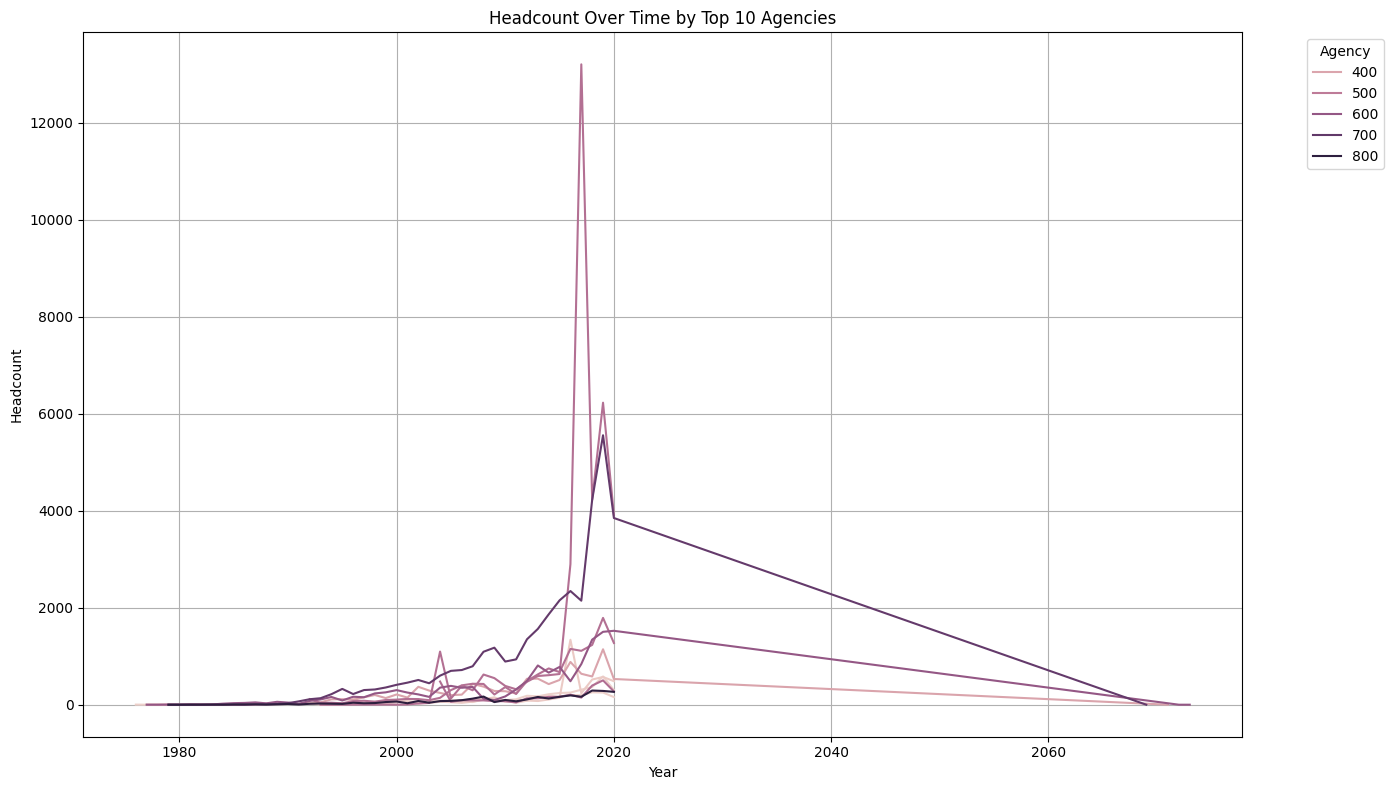

In [18]:
# prompt: Have salaries and total compensations for some roles/ departments/ head-count changed over time?

# Re-load the data to ensure the 'EMPLOY DATE' column is available for time series analysis
df_time = pd.read_csv("salary.csv")

# Drop irrelevant columns for this specific analysis, keeping 'EMPLOY DATE'
drop_cols_time = ['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
                  'summed_annual_salary', 'hide_from_search']
df_time.drop(columns=drop_cols_time, inplace=True)

# Convert 'EMPLOY DATE' to datetime objects
df_time['EMPLOY DATE'] = pd.to_datetime(df_time['EMPLOY DATE'], errors='coerce')

# Drop rows where 'EMPLOY DATE' could not be parsed (is NaT)
df_time.dropna(subset=['EMPLOY DATE', 'ANNUAL'], inplace=True)

# Extract the year from the 'EMPLOY DATE'
df_time['YEAR'] = df_time['EMPLOY DATE'].dt.year

# Aggregate data by year to see overall average salary changes
yearly_avg_salary = df_time.groupby('YEAR')['ANNUAL'].mean().reset_index()

# Plot the trend of average salary over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='ANNUAL', data=yearly_avg_salary)
plt.title('Average Annual Salary Over Time')
plt.xlabel('Year')
plt.ylabel('Average Annual Salary')
plt.grid(True)
plt.show()

# To analyze changes for specific roles/departments (assuming 'JOB' or 'AGENCY' columns represent this)
# Aggregate data by year and a relevant category (e.g., 'AGENCY')
# First, find the top agencies to focus on for clarity
top_agencies = df_time['AGENCY'].value_counts().nlargest(10).index.tolist()

# Filter the dataframe to include only the top agencies
df_top_agencies = df_time[df_time['AGENCY'].isin(top_agencies)]

# Aggregate average salary by year and agency
yearly_agency_avg_salary = df_top_agencies.groupby(['YEAR', 'AGENCY'])['ANNUAL'].mean().reset_index()

# Plot the trend for top agencies
plt.figure(figsize=(14, 8))
sns.lineplot(x='YEAR', y='ANNUAL', hue='AGENCY', data=yearly_agency_avg_salary)
plt.title('Average Annual Salary Over Time by Top 10 Agencies')
plt.xlabel('Year')
plt.ylabel('Average Annual Salary')
plt.legend(title='Agency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
# Analyze headcount change over time
yearly_headcount = df_time.groupby('YEAR').size().reset_index(name='HEADCOUNT')

plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='HEADCOUNT', data=yearly_headcount)
plt.title('Headcount Over Time')
plt.xlabel('Year')
plt.ylabel('Headcount')
plt.grid(True)
plt.show()

# Analyze headcount change for top agencies over time
yearly_agency_headcount = df_top_agencies.groupby(['YEAR', 'AGENCY']).size().reset_index(name='HEADCOUNT')

plt.figure(figsize=(14, 8))
sns.lineplot(x='YEAR', y='HEADCOUNT', hue='AGENCY', data=yearly_agency_headcount)
plt.title('Headcount Over Time by Top 10 Agencies')
plt.xlabel('Year')
plt.ylabel('Headcount')
plt.legend(title='Agency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# prompt: What departments/roles have the biggest wage disparities between managers and employees?

# Ensure original dataframe with 'JOB' and 'AGENCY' is used before label encoding
df_analysis = pd.read_csv("/content/salary.csv")
drop_cols_analysis = ['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
                      'summed_annual_salary', 'hide_from_search']
df_analysis.drop(columns=drop_cols_analysis, inplace=True)

# Define 'Manager' based on 'JOB' or 'POSITION TITLE' - this requires looking at the unique values in the data
# Let's assume 'POSITION TITLE' is more granular and contains 'MANAGER' or similar terms
# You might need to inspect unique values of df_analysis['POSITION TITLE'] or df_analysis['JOB']
# For demonstration, let's create a simple indicator if 'MANAGER' is in the title
df_analysis['IS_MANAGER'] = df_analysis['CLASS TITLE'].str.contains('MANAGER', case=False, na=False) | \
                            df_analysis['AGENCY NAME'].str.contains('MANAGER', case=False, na=False) # Check 'AGENCY NAME' too if needed

# Filter out non-numeric salary or other necessary columns
df_analysis.dropna(subset=['ANNUAL', 'AGENCY', 'CLASS TITLE'], inplace=True)


# Group by Department (Agency) and Manager Status
salary_by_agency_role = df_analysis.groupby(['AGENCY', 'IS_MANAGER'])['ANNUAL'].mean().unstack()

# Calculate the difference and ratio
salary_by_agency_role['DIFFERENCE'] = salary_by_agency_role[True] - salary_by_agency_role[False]
salary_by_agency_role['RATIO'] = salary_by_agency_role[True] / salary_by_agency_role[False]

# Sort by the biggest difference
biggest_disparity_diff = salary_by_agency_role.sort_values(by='DIFFERENCE', ascending=False)

# Sort by the biggest ratio (can indicate larger relative disparity, especially with lower base salaries)
biggest_disparity_ratio = salary_by_agency_role.sort_values(by='RATIO', ascending=False)

print("Wage disparity by Agency (sorted by difference - Manager Avg - Employee Avg):")
print(biggest_disparity_diff.head(10)) # Display top 10 departments

print("\nWage disparity by Agency (sorted by ratio - Manager Avg / Employee Avg):")
print(biggest_disparity_ratio.head(10)) # Display top 10 departments

# You can also perform a similar analysis using 'JOB' if it represents departments/roles
# For demonstration, let's do it for 'JOB' as well, assuming it's different from 'AGENCY'

# Group by Job and Manager Status
salary_by_job_role = df_analysis.groupby(['CLASS TITLE', 'IS_MANAGER'])['ANNUAL'].mean().unstack()

# Calculate the difference and ratio
salary_by_job_role['DIFFERENCE'] = salary_by_job_role[True] - salary_by_job_role[False]
salary_by_job_role['RATIO'] = salary_by_job_role[True] / salary_by_job_role[False]

# Sort by the biggest difference
biggest_disparity_job_diff = salary_by_job_role.sort_values(by='DIFFERENCE', ascending=False)

# Sort by the biggest ratio
biggest_disparity_job_ratio = salary_by_job_role.sort_values(by='RATIO', ascending=False)

print("\nWage disparity by Class Title (sorted by difference - Manager Avg - Employee Avg):")
print(biggest_disparity_job_diff.head(10)) # Display top 10 jobs

print("\nWage disparity by Class Title (sorted by ratio - Manager Avg / Employee Avg):")
print(biggest_disparity_job_ratio.head(10)) # Display top 10 jobs

# Note: The identification of 'Manager' roles is a simplification.
# A more robust approach would involve a dictionary mapping manager titles or looking for specific keywords
# in the 'CLASS TITLE' or 'AGENCY NAME' columns based on domain knowledge of the dataset.
# Also, departments might be better represented by 'AGENCY' or another column depending on the data dictionary.

/tmp/ipython-input-48611933.py:4: DtypeWarning: Columns (16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_analysis = pd.read_csv("/content/salary.csv")


Wage disparity by Agency (sorted by difference - Manager Avg - Employee Avg):
IS_MANAGER          False           True     DIFFERENCE     RATIO
AGENCY                                                           
542         114150.071250  214999.920000  100849.848750  1.883485
332          68195.697534  154944.000000   86748.302466  2.272049
323          89945.544772  176355.428571   86409.883799  1.960691
327          82238.451166  161562.917143   79324.465977  1.964567
701          84223.443879  141114.067692   56890.623813  1.675473
809          40635.019636   90000.000000   49364.980364  2.214838
308          79796.059882  126369.768000   46573.708118  1.583659
460          74349.795556  119870.640000   45520.844444  1.612252
307          53789.825028   97484.280000   43694.454972  1.812318
104          85263.464082  126872.140000   41608.675918  1.488001

Wage disparity by Agency (sorted by ratio - Manager Avg / Employee Avg):
IS_MANAGER          False           True     DIFFERENCE 

Model Performance Comparison:
                  Model  Mean Squared Error (MSE)  R-squared (R2)
Random Forest Regressor              4.713866e+07        0.932537
      Linear Regression              5.785894e+08        0.171943
      XGBoost Regressor              1.008549e+08        0.855660
Decision Tree Regressor              6.530022e+07        0.906545


/tmp/ipython-input-3849281128.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(performance_df['Model'], rotation=45, ha='right')
/tmp/ipython-input-3849281128.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(performance_df['Model'], rotation=45, ha='right')


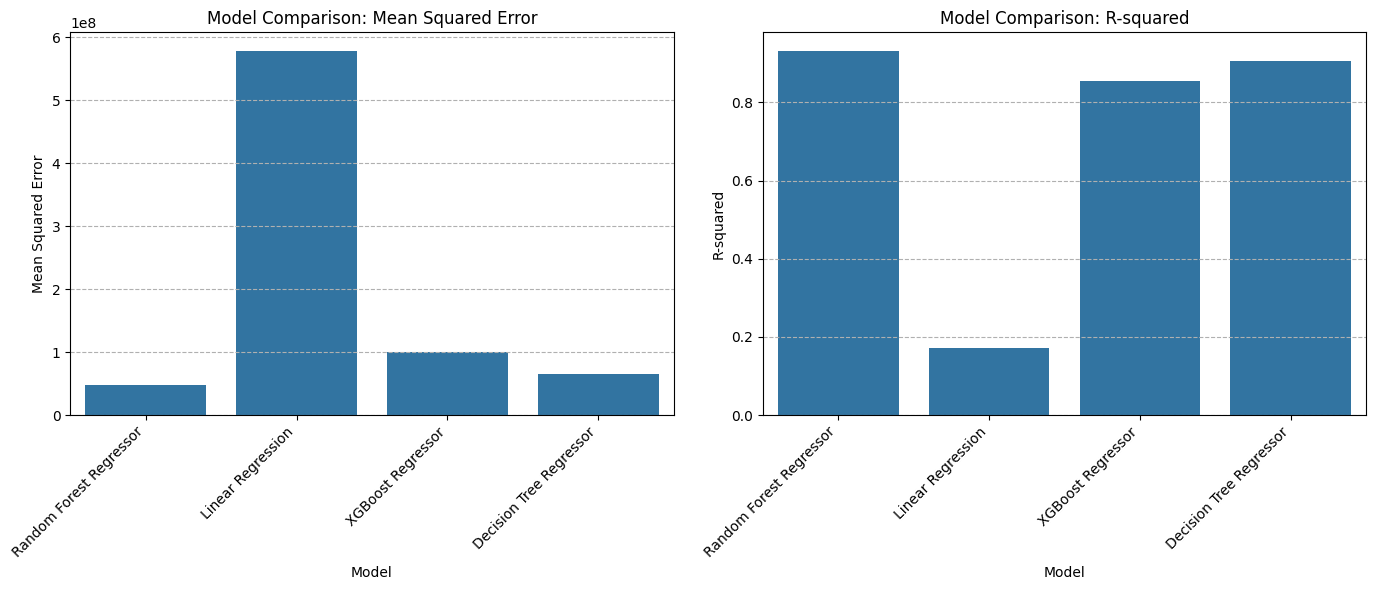

In [21]:
# prompt: MODEL COMPARISION REPORT WITH DIGRAMATIC REPRESENTATION

# Create a DataFrame to store model performance metrics
performance_data = {
    'Model': ['Random Forest Regressor', 'Linear Regression', 'XGBoost Regressor', 'Decision Tree Regressor'],
    'Mean Squared Error (MSE)': [mse, mse_lr, mse_xgb, mse_dt],
    'R-squared (R2)': [r2, r2_lr, r2_xgb, r2_dt]
}

performance_df = pd.DataFrame(performance_data)

# Print the performance comparison table
print("Model Performance Comparison:")
print(performance_df.to_string(index=False))

# --- Diagremmatic Representation ---
# Using a bar chart to compare MSE and R-squared visually

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for MSE
sns.barplot(x='Model', y='Mean Squared Error (MSE)', data=performance_df, ax=axes[0])
axes[0].set_title('Model Comparison: Mean Squared Error')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_xticklabels(performance_df['Model'], rotation=45, ha='right')
axes[0].grid(axis='y', linestyle='--')

# Bar chart for R-squared
sns.barplot(x='Model', y='R-squared (R2)', data=performance_df, ax=axes[1])
axes[1].set_title('Model Comparison: R-squared')
axes[1].set_ylabel('R-squared')
axes[1].set_xticklabels(performance_df['Model'], rotation=45, ha='right')
axes[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# You can also create a more detailed report or dashboard using libraries like Dash or Streamlit
# for interactive visualization and reporting if needed, but this provides a clear comparison table and diagrams.
